In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read train.csv and test.csv to pandas DataFrame

In [4]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [5]:
# Inspect Data

In [6]:
train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
age                                 199523 non-null int64
class_of_worker                     199523 non-null object
industry_code                       199523 non-null int64
occupation_code                     199523 non-null int64
education                           199523 non-null object
wage_per_hour                       199523 non-null int64
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_par

In [8]:
# Data has missing values

In [9]:
# Visualise value_counts of unique values in each column

In [10]:
import matplotlib.pyplot as plt
from math import ceil

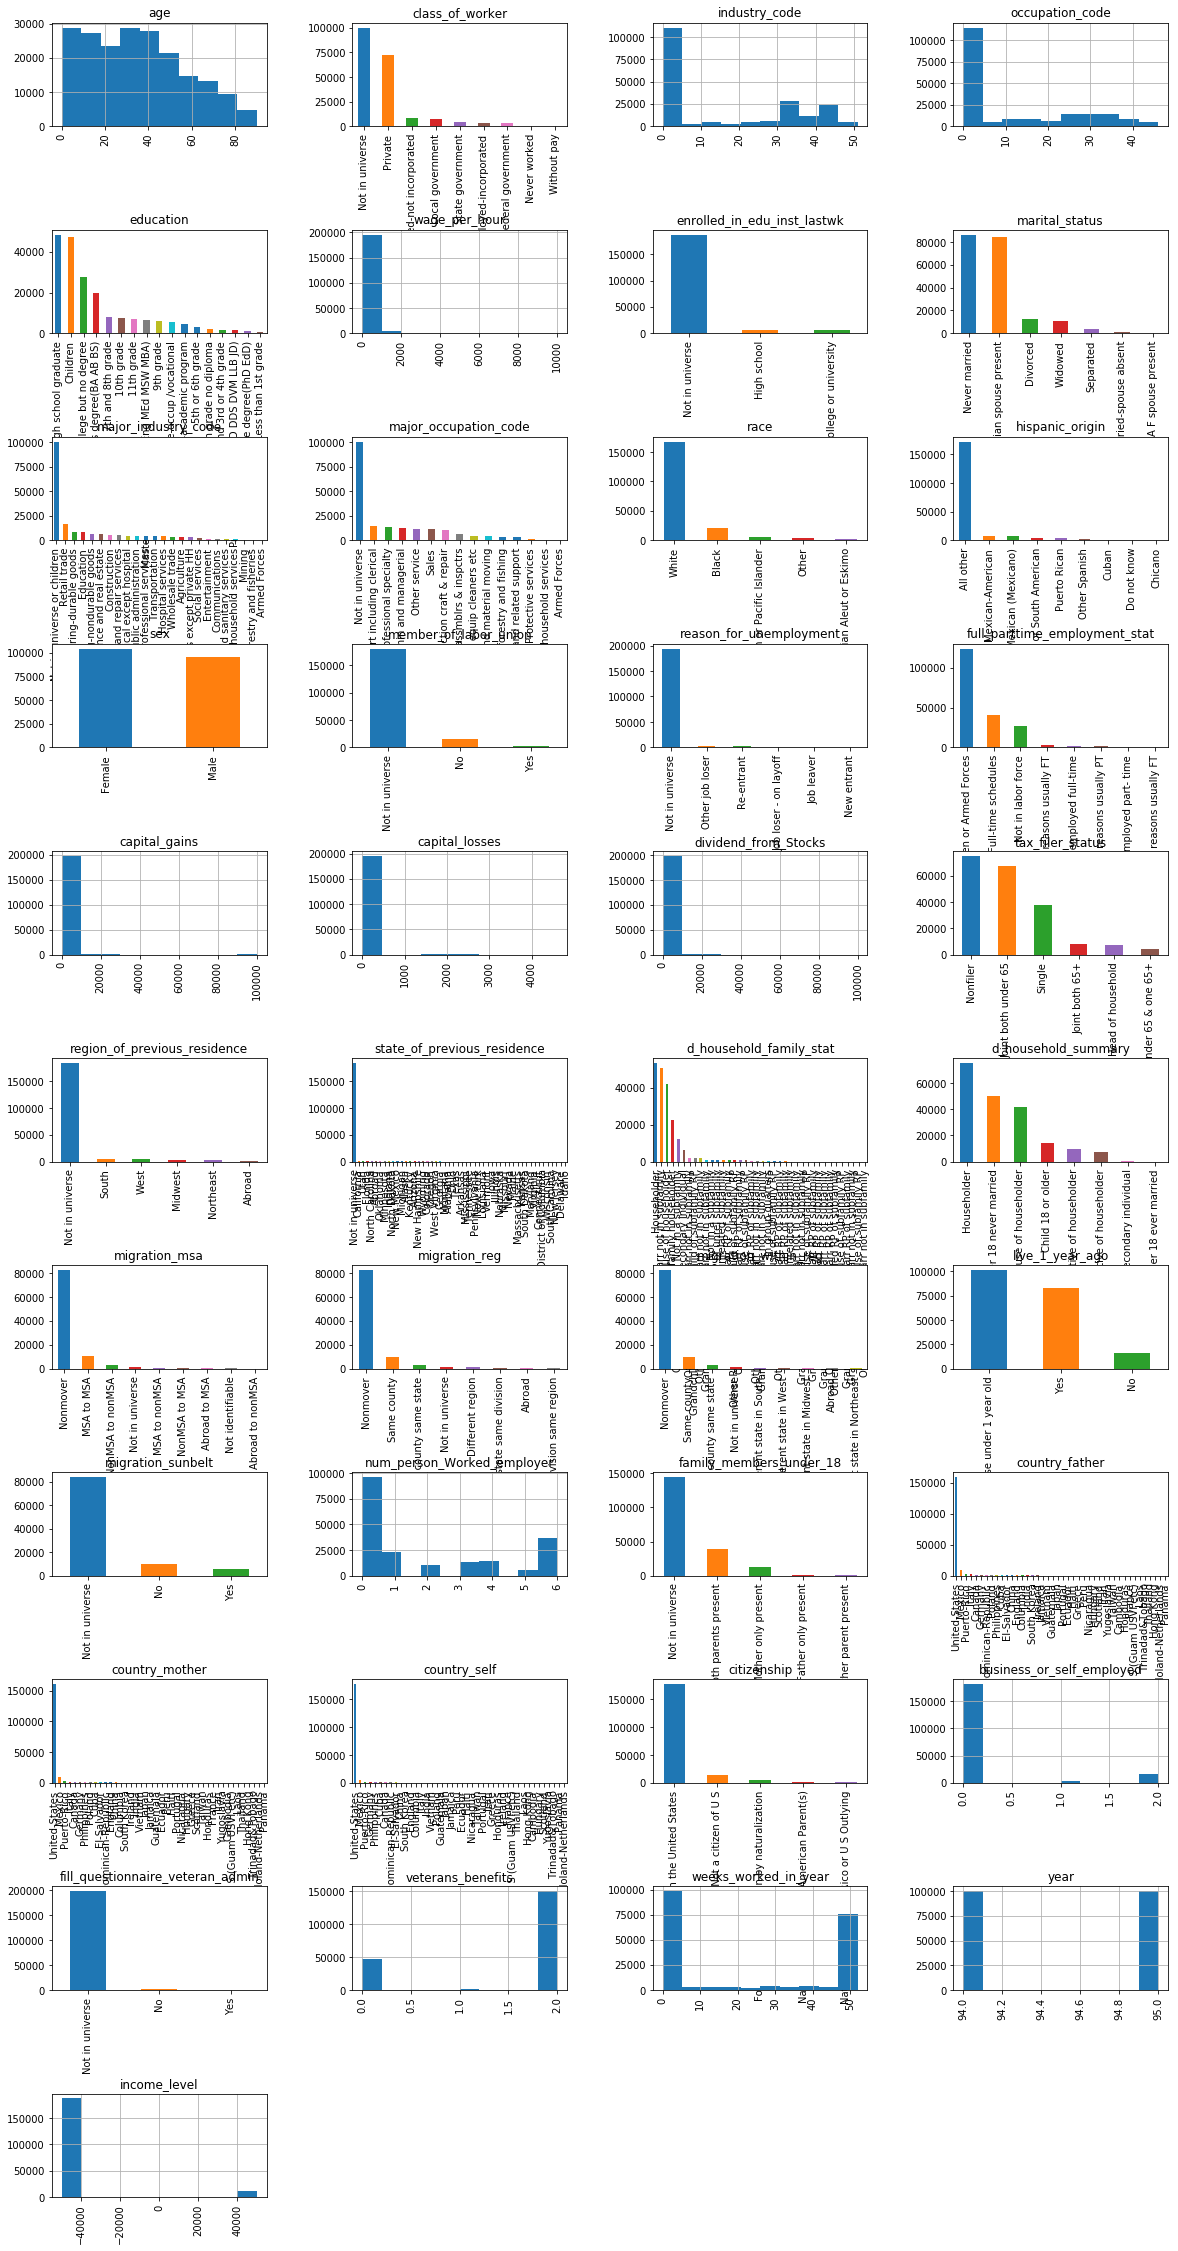

In [11]:
fig = plt.figure(figsize=(20,40))
cols = 4
rows = ceil(float(train.shape[1]/cols))
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind='bar', axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=1, wspace=0.4)
plt.show()

In [12]:
# Data is heavily unbalanced

In [13]:
train.income_level.value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

In [14]:
# Only 6% support for 50000 bin

In [15]:
# Check unique values in column with dtype np.object

In [16]:
for column in train:
    if train[column].dtypes == np.object:
        print(train[column].unique())

['Not in universe' 'Self-employed-not incorporated' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay']
['High school graduate' 'Some college but no degree' '10th grade'
 'Children' 'Bachelors degree(BA AB BS)'
 'Masters degree(MA MS MEng MEd MSW MBA)' 'Less than 1st grade'
 'Associates degree-academic program' '7th and 8th grade'
 '12th grade no diploma' 'Associates degree-occup /vocational'
 'Prof school degree (MD DDS DVM LLB JD)' '5th or 6th grade' '11th grade'
 'Doctorate degree(PhD EdD)' '9th grade' '1st 2nd 3rd or 4th grade']
['Not in universe' 'High school' 'College or university']
['Widowed' 'Divorced' 'Never married' 'Married-civilian spouse present'
 'Separated' 'Married-spouse absent' 'Married-A F spouse present']
['Not in universe or children' 'Construction' 'Entertainment'
 'Finance insurance and real estate' 'Education'
 'Business and repair services' 'Manufacturing-nondurable goods'
 'Personal

In [17]:
# 'Not in universe' is present in almost every column

In [18]:
# Count occurences of 'Not in universe' in columns with dtype np.object

In [19]:
for column in train:
    if train[column].dtypes == np.object:
        try:
            print(column, '--', train[column].value_counts()['Not in universe'])
        except:
            pass

class_of_worker -- 100245
enrolled_in_edu_inst_lastwk -- 186943
major_occupation_code -- 100684
member_of_labor_union -- 180459
reason_for_unemployment -- 193453
region_of_previous_residence -- 183750
state_of_previous_residence -- 183750
migration_msa -- 1516
migration_reg -- 1516
migration_within_reg -- 1516
migration_sunbelt -- 84054
family_members_under_18 -- 144232
fill_questionnaire_veteran_admin -- 197539


In [20]:
# Fill missing values with 'Not in universe'

In [21]:
train = train.fillna(value='Not in universe')
test = test.fillna(value='Not in universe')

In [22]:
# test['income_level'].dtype is np.object

In [23]:
test.income_level.unique()

array(['-50000', ' 50000+.'], dtype=object)

In [24]:
# Binarize income_level

In [25]:
train.income_level.replace(to_replace={50000:1,-50000:0},inplace=True)
test.income_level.replace(to_replace={' 50000+.':1,'-50000':0},inplace=True)

In [26]:
### Split train data by majority and minority class

In [27]:
train.income_level.value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [28]:
train_majority = train[train.income_level==0]
train_minority = train[train.income_level==1]

In [29]:
### Upsample minority class data

In [30]:
from sklearn.utils import resample

In [31]:
n_samples = train_majority.income_level.value_counts().max()
train_minority_upsampled = resample(train_minority, replace=True, n_samples=n_samples,random_state=100)

In [32]:
# Concatenate upsampled minority class data to majority

In [33]:
train = pd.concat([train_majority,train_minority_upsampled])

In [34]:
# Save original data for reuse

In [35]:
train_original = train.copy()
test_original = test.copy()

In [36]:
# Encode categorical columns

In [37]:
# Define function for encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
def encode(df):
    encoders = {}
    for column in df.columns:
        if df.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            df[column] = encoders[column].fit_transform(df[column])
    return encoders

In [40]:
# Encode train and test data

In [41]:
encode(train)

{'class_of_worker': LabelEncoder(),
 'education': LabelEncoder(),
 'enrolled_in_edu_inst_lastwk': LabelEncoder(),
 'marital_status': LabelEncoder(),
 'major_industry_code': LabelEncoder(),
 'major_occupation_code': LabelEncoder(),
 'race': LabelEncoder(),
 'hispanic_origin': LabelEncoder(),
 'sex': LabelEncoder(),
 'member_of_labor_union': LabelEncoder(),
 'reason_for_unemployment': LabelEncoder(),
 'full_parttime_employment_stat': LabelEncoder(),
 'tax_filer_status': LabelEncoder(),
 'region_of_previous_residence': LabelEncoder(),
 'state_of_previous_residence': LabelEncoder(),
 'd_household_family_stat': LabelEncoder(),
 'd_household_summary': LabelEncoder(),
 'migration_msa': LabelEncoder(),
 'migration_reg': LabelEncoder(),
 'migration_within_reg': LabelEncoder(),
 'live_1_year_ago': LabelEncoder(),
 'migration_sunbelt': LabelEncoder(),
 'family_members_under_18': LabelEncoder(),
 'country_father': LabelEncoder(),
 'country_mother': LabelEncoder(),
 'country_self': LabelEncoder(),


In [42]:
encode(test)

{'class_of_worker': LabelEncoder(),
 'education': LabelEncoder(),
 'enrolled_in_edu_inst_lastwk': LabelEncoder(),
 'marital_status': LabelEncoder(),
 'major_industry_code': LabelEncoder(),
 'major_occupation_code': LabelEncoder(),
 'race': LabelEncoder(),
 'hispanic_origin': LabelEncoder(),
 'sex': LabelEncoder(),
 'member_of_labor_union': LabelEncoder(),
 'reason_for_unemployment': LabelEncoder(),
 'full_parttime_employment_stat': LabelEncoder(),
 'tax_filer_status': LabelEncoder(),
 'region_of_previous_residence': LabelEncoder(),
 'state_of_previous_residence': LabelEncoder(),
 'd_household_family_stat': LabelEncoder(),
 'd_household_summary': LabelEncoder(),
 'migration_msa': LabelEncoder(),
 'migration_reg': LabelEncoder(),
 'migration_within_reg': LabelEncoder(),
 'live_1_year_ago': LabelEncoder(),
 'migration_sunbelt': LabelEncoder(),
 'family_members_under_18': LabelEncoder(),
 'country_father': LabelEncoder(),
 'country_mother': LabelEncoder(),
 'country_self': LabelEncoder(),


In [43]:
# Create X and y data structures for training and testing

In [44]:
X_train = train.drop(columns='income_level')
y_train = train[['income_level']]

X_test = test.drop(columns='income_level')
y_test = test[['income_level']]

In [45]:
# Delete train and test to free up memory

In [46]:
del train,test

In [47]:
# Plot correlation

In [48]:
import seaborn as sns

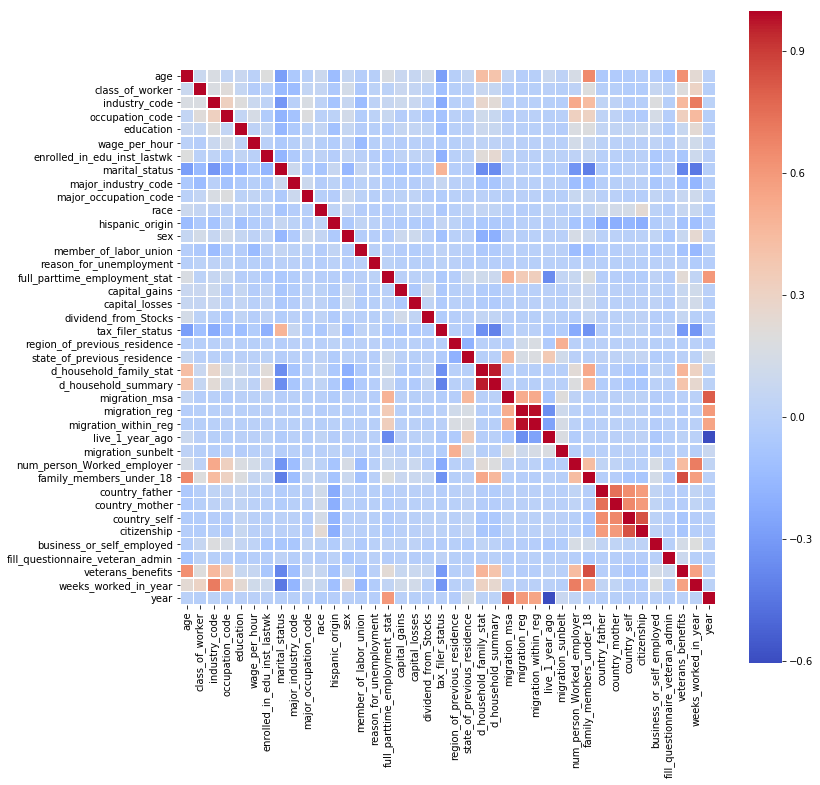

In [49]:
plt.subplots(figsize=(12,12))
sns.heatmap(X_train.corr(), cmap='coolwarm', square=True, linewidths=0.5,linecolor='white')
plt.show()

In [50]:
# Country, migration and householding data have higher correlation

In [51]:
train_original.d_household_family_stat.value_counts()

Householder                                        163931
Spouse of householder                               73836
Child <18 never marr not in subfamily               50362
Nonfamily householder                               47747
Child 18+ never marr Not in a subfamily             13271
Secondary individual                                 9260
Other Rel 18+ ever marr not in subfamily             2235
Other Rel 18+ never marr not in subfamily            2030
Grandchild <18 never marr child of subfamily RP      1868
Child 18+ ever marr Not in a subfamily               1333
Grandchild <18 never marr not in subfamily           1066
Other Rel 18+ spouse of subfamily RP                  954
Other Rel 18+ ever marr RP of subfamily               937
Child 18+ ever marr RP of subfamily                   848
RP of unrelated subfamily                             808
Child under 18 of RP of unrel subfamily               732
Other Rel <18 never marr child of subfamily RP        656
Child 18+ neve

In [52]:
train_original.d_household_summary.value_counts()

Householder                             211711
Spouse of householder                    73850
Child under 18 never married             50462
Child 18 or older                        16216
Nonrelative of householder               10927
Other relative of householder            10923
Group Quarters- Secondary individual       146
Child under 18 ever married                 47
Name: d_household_summary, dtype: int64

In [53]:
# Correlation in householding data is due to numerical encoding, both contain 'household'

In [54]:
# Decision Tree model

In [55]:
# Create Decision Tree Classifier object

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model_dt = DecisionTreeClassifier()

In [58]:
# Train model

In [59]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
# Generate predictions

In [61]:
predictions_dt = model_dt.predict(X_test)

In [62]:
# Evaluate model

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_test.values,predictions_dt))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96     93576
          1       0.42      0.35      0.38      6186

avg / total       0.92      0.93      0.93     99762



In [65]:
print(confusion_matrix(y_test.values,predictions_dt))

[[90566  3010]
 [ 4019  2167]]


In [66]:
# Plot ROC curve

In [67]:
from sklearn.metrics import roc_curve,roc_auc_score

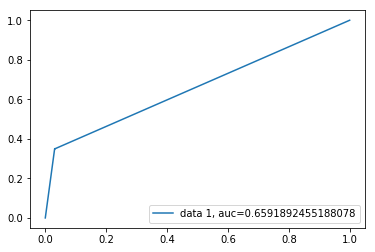

In [68]:
y_pred_proba = model_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [69]:
# Plot Feature Importances for Decision Tree Classifier

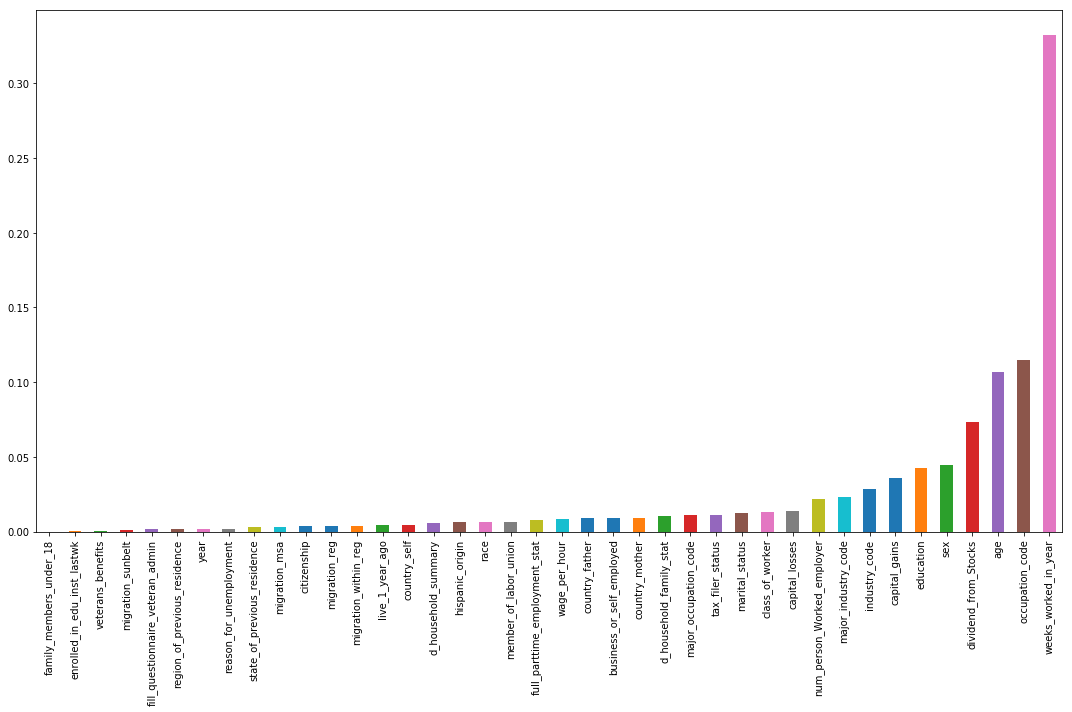

In [70]:
feat_import = pd.Series(model_dt.feature_importances_, index=X_train.columns)
feat_import = feat_import.sort_values()
#plt.subplot(2,1,2)
plt.figure(figsize=(15,10))
feat_import.plot(kind="bar")
plt.tight_layout()
plt.show()

In [71]:
# weeks_worked_in_year has been given highest importance

In [72]:
# Create GBM model

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

/home/anonymous/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [74]:
# Create Gradient Boosting Classifier object

In [75]:
# Lower value for n_estimator, raise learning_rate

In [76]:
model_gbm = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0)

In [77]:
model_gbm.fit(X_train,y_train)

/home/anonymous/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [78]:
# Generate predictions

In [79]:
predictions_gbm = model_gbm.predict(X_test)

In [80]:
# Evaluate model

In [81]:
print(classification_report(y_test,predictions_gbm))

             precision    recall  f1-score   support

          0       0.99      0.84      0.91     93576
          1       0.26      0.86      0.40      6186

avg / total       0.94      0.84      0.88     99762



In [82]:
print(confusion_matrix(y_test.values,predictions_gbm))

[[78464 15112]
 [  845  5341]]


In [83]:
# Though recall improved, precsion has decreased by 38%

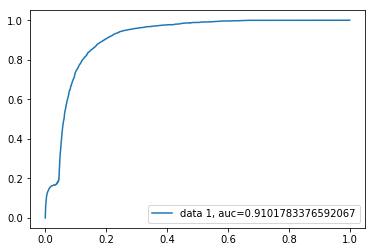

In [84]:
y_pred_proba = model_gbm.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [85]:
# Encoding numerically creates co-relation which is not present inherently

# Binarize Data

In [86]:
# Concatenate train and test to ensure consistent binarizing

In [87]:
df = [train_original,test_original]
data = pd.concat(df)

In [88]:
# Binarise data

In [89]:
data_dummy = pd.get_dummies(data)

In [90]:
# Separate out train and test data

In [91]:
# Set index for separation from original data

In [92]:
end_train = train_original.shape[0] + 1
start_test = train_original.shape[0]

In [93]:
train = data_dummy.iloc[:end_train,:]
test = data_dummy.iloc[start_test:,:]

In [94]:
### Create X and y data structues for training and testing

In [95]:
X_train = train.drop(columns='income_level')
y_train = train[['income_level']]

X_test = test.drop(columns='income_level')
y_test = test[['income_level']]

In [96]:
# Delete data_dummy, train_original, test_original, train, test

In [97]:
del data_dummy, train_original, test_original, train, test

In [98]:
# Create new Decision Tree Model

In [99]:
model_dt2 = DecisionTreeClassifier()

In [100]:
model_dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
predictions_dt2 = model_dt2.predict(X_test)

In [102]:
print(classification_report(y_test,predictions_dt2))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96     93576
          1       0.42      0.36      0.39      6186

avg / total       0.92      0.93      0.93     99762



In [103]:
print(confusion_matrix(y_test.values,predictions_dt2))

[[90493  3083]
 [ 3956  2230]]


In [105]:
# Plot ROC Curve

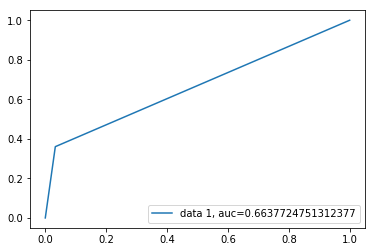

In [106]:
y_pred_proba = model_dt2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [107]:
# Decision Tree with binary inputs is the selected model for given data